Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136472 entries, 0 to 136471
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   LOCATION             136472 non-null  object 
 1   DATE_TIME            136472 non-null  object 
 2   SENSOR_ID            136472 non-null  object 
 3   DC_POWER             136472 non-null  float64
 4   AC_POWER             136472 non-null  float64
 5   DAILY_YIELD          136472 non-null  float64
 6   TOTAL_YIELD          136472 non-null  float64
 7   AMBIENT_TEMPERATURE  136472 non-null  float64
 8   MODULE_TEMPERATURE   136472 non-null  float64
 9   IRRADIATION          136472 non-null  float64
dtypes: float64(7), object(3)
memory usage: 10.4+ MB
None

First 5 Rows of the Dataset:
  LOCATION            DATE_TIME  SENSOR_ID  DC_POWER  AC_POWER  DAILY_YIELD  \
0        A  2020-05-15 00:00:00   sensor 1       0.0       0.0          0.0   
1        A

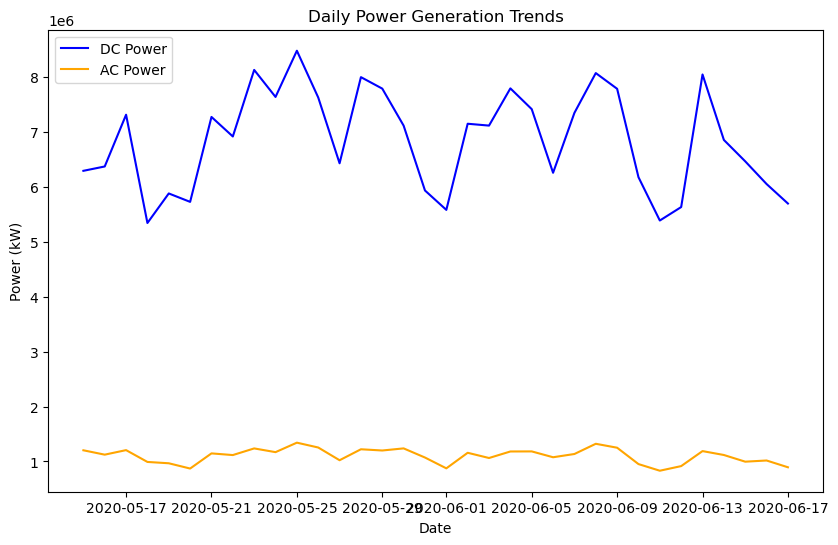

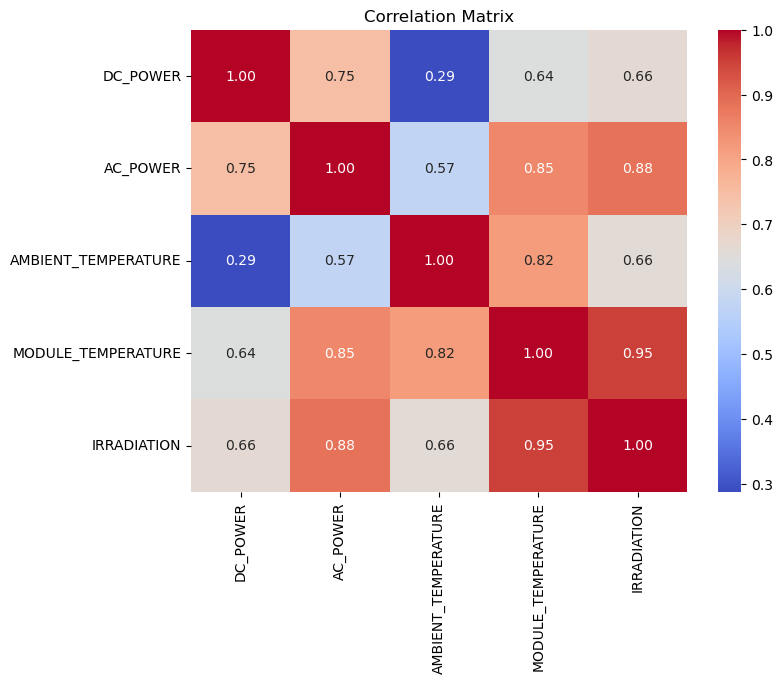

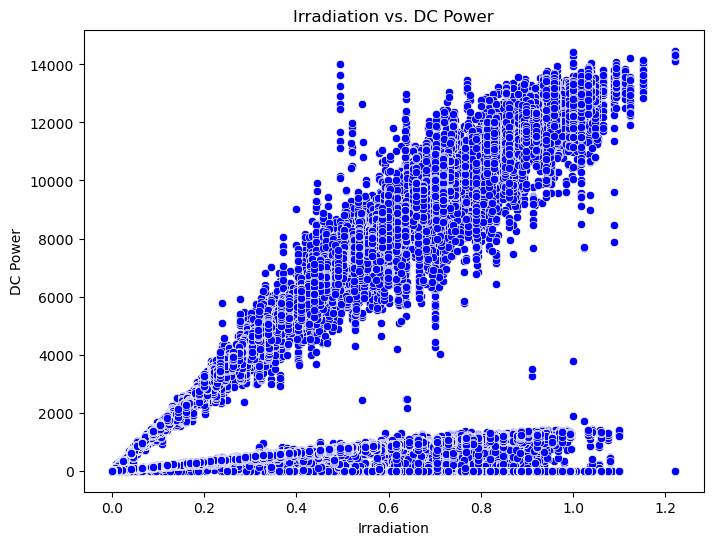

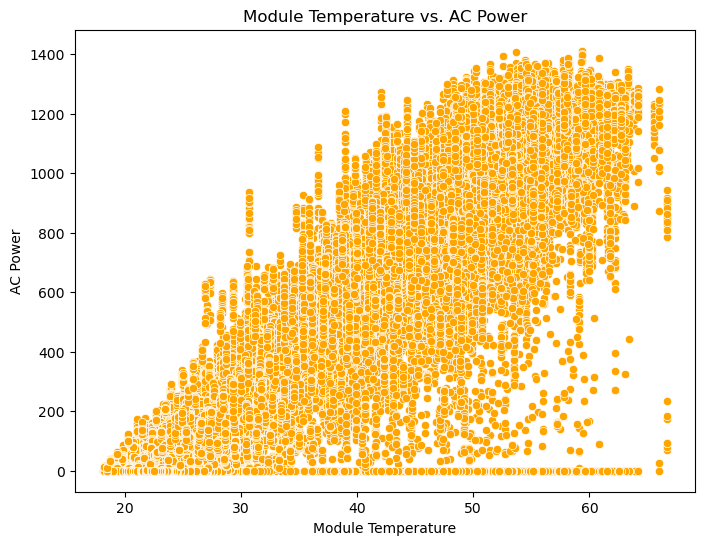

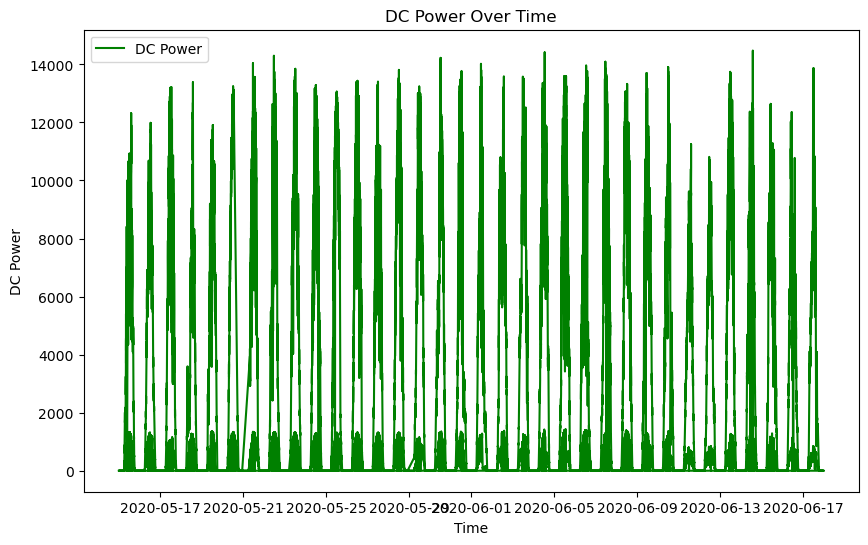


Potential Anomalies (High Irradiation, Low DC Power):
Empty DataFrame
Columns: [LOCATION, DATE_TIME, SENSOR_ID, DC_POWER, AC_POWER, DAILY_YIELD, TOTAL_YIELD, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION]
Index: []

Anomalies saved to anomalies.csv


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "merged_solar_weather_data.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# 1. Data Overview
print("Dataset Information:")
print(data.info())

print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(data.duplicated().sum())

# 2. Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())

# 3. Convert 'DATE_TIME' to datetime format for time-based analysis
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])

# 4. Aggregate daily data for temporal patterns
daily_data = data.groupby(data['DATE_TIME'].dt.date).agg({
    'DC_POWER': 'sum',
    'AC_POWER': 'sum',
    'DAILY_YIELD': 'max',
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'sum'
}).reset_index()

# Plot daily power generation trends
plt.figure(figsize=(10, 6))
plt.plot(daily_data['DATE_TIME'], daily_data['DC_POWER'], label='DC Power', color='blue')
plt.plot(daily_data['DATE_TIME'], daily_data['AC_POWER'], label='AC Power', color='orange')
plt.title('Daily Power Generation Trends')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

# 5. Correlation Analysis
correlation_matrix = data[['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 6. Scatterplots for insights and anomalies

# a. Irradiation vs DC Power
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IRRADIATION', y='DC_POWER', data=data, color='blue')
plt.title('Irradiation vs. DC Power')
plt.xlabel('Irradiation')
plt.ylabel('DC Power')
plt.show()

# b. Module Temperature vs AC Power
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MODULE_TEMPERATURE', y='AC_POWER', data=data, color='orange')
plt.title('Module Temperature vs. AC Power')
plt.xlabel('Module Temperature')
plt.ylabel('AC Power')
plt.show()

# c. DC Power Over Time
plt.figure(figsize=(10, 6))
plt.plot(data['DATE_TIME'], data['DC_POWER'], label='DC Power', color='green')
plt.title('DC Power Over Time')
plt.xlabel('Time')
plt.ylabel('DC Power')
plt.legend()
plt.show()

# 7. Identify anomalies
# Example: Rows where irradiation is high, but DC Power is low
high_irradiation_low_power = data[
    (data['IRRADIATION'] > data['IRRADIATION'].quantile(0.75)) &
    (data['DC_POWER'] < data['DC_POWER'].quantile(0.25))
]
print("\nPotential Anomalies (High Irradiation, Low DC Power):")
print(high_irradiation_low_power)

# Save anomalies to a CSV for further analysis
high_irradiation_low_power.to_csv("anomalies.csv", index=False)
print("\nAnomalies saved to anomalies.csv")
